# Chapter 2. Natural Language Processing

## Setup

In [1]:
import nltk
nltk.__file__

'D:\\Users\\feder\\Anaconda3\\lib\\site-packages\\nltk\\__init__.py'

In [2]:
#nltk.download()

## Corpus

In [3]:
from nltk.corpus import names
print(names.words()[:10])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [4]:
print(len(names.words()))

7944


## Tokenization

In [5]:
from nltk.tokenize import word_tokenize
sent = '''I amd reading a book. 
It is Python Machine Learning by Example, 
2nd edition.'''
print(word_tokenize(sent))

['I', 'amd', 'reading', 'a', 'book', '.', 'It', 'is', 'Python', 'Machine', 'Learning', 'by', 'Example', ',', '2nd', 'edition', '.']


In [6]:
sent2 = "I have been to U.K. and U.S.A."
print(word_tokenize(sent2))

['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A', '.']


In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')
tokens2 = nlp(sent2)
print([token.text for token in tokens2])

['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A.']


In [8]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(sent))

['I amd reading a book.', 'It is Python Machine Learning by Example, \n2nd edition.']


## POS Tagging

In [9]:
import nltk
tokens = word_tokenize(sent)
print(nltk.pos_tag(tokens))
nltk.help.upenn_tagset('PRP')
nltk.help.upenn_tagset('VBP')
nltk.help.upenn_tagset('NNP')
nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('CD')
nltk.help.upenn_tagset('DT')

[('I', 'PRP'), ('amd', 'VBP'), ('reading', 'VBG'), ('a', 'DT'), ('book', 'NN'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('Python', 'NNP'), ('Machine', 'NNP'), ('Learning', 'NNP'), ('by', 'IN'), ('Example', 'NNP'), (',', ','), ('2nd', 'CD'), ('edition', 'NN'), ('.', '.')]
PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed therm

In [10]:
print([(token.text,token.pos_) for token in tokens2])

[('I', 'PRON'), ('have', 'AUX'), ('been', 'AUX'), ('to', 'ADP'), ('U.K.', 'PROPN'), ('and', 'CCONJ'), ('U.S.A.', 'PROPN')]


## Named-entity recognition

In [11]:
tokens3 = nlp('THe book written by Hayden Lui in 2018 was sold at $30 in America.')
print([(token_ent.text,token_ent.label_)for token_ent in tokens3.ents])

[('Hayden Lui', 'PERSON'), ('2018', 'DATE'), ('30', 'MONEY'), ('America', 'GPE')]


## Stemming and lemmantization

In [12]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [13]:
porter_stemmer.stem('machines')

'machin'

In [14]:
porter_stemmer.stem('learning')

'learn'

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [16]:
lemmatizer.lemmatize("machines")

'machine'

In [17]:
lemmatizer.lemmatize("learning")

'learning'

In [18]:
from sklearn.datasets import fetch_20newsgroups
groups = fetch_20newsgroups()

In [19]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [20]:
#newsgroups names
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [21]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [22]:
import numpy as np
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

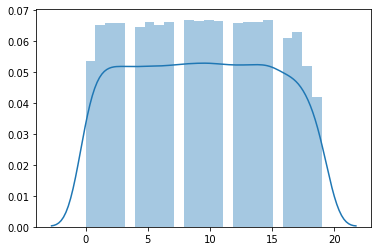

In [23]:
import seaborn as sns
sns.distplot(groups.target)
import matplotlib.pyplot as plt
plt.show()

In [24]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [25]:
groups.target_names[groups.target[0]]

'rec.autos'

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
count_vector = CountVectorizer(max_features=500)
data_count = count_vector.fit_transform(groups.data)
data_count[0]

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 53 stored elements in Compressed Sparse Row format>

In [28]:
data_count.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
print(count_vector.get_feature_names())

['00', '000', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '20', '21', '22', '23', '24', '25', '26', '27', '30', '32', '34', '40', '50', '93', 'a86', 'able', 'about', 'above', 'ac', 'access', 'actually', 'address', 'after', 'again', 'against', 'ago', 'all', 'already', 'also', 'always', 'am', 'american', 'an', 'and', 'andrew', 'another', 'answer', 'any', 'anyone', 'anything', 'apple', 'apr', 'april', 'are', 'armenian', 'around', 'article', 'as', 'ask', 'at', 'au', 'available', 'away', 'ax', 'b8f', 'back', 'bad', 'based', 'be', 'because', 'been', 'before', 'being', 'believe', 'best', 'better', 'between', 'bible', 'big', 'bill', 'bit', 'book', 'both', 'but', 'buy', 'by', 'ca', 'call', 'called', 'came', 'can', 'canada', 'cannot', 'car', 'card', 'case', 'cc', 'center', 'change', 'children', 'chip', 'christian', 'clipper', 'co', 'code', 'color', 'com', 'come', 'computer', 'control', 'could', 'course', 'cs', 'current', 'data', 'david', 'day', 'days', 'de',

In [30]:
def is_letter_only(word):
    for char in word:
        if not char.isalpha():
            return False
        return True

In [31]:
data_cleaned = []
for doc in groups.data:
    doc_cleaned = ' '.join(word for word in doc.split()
                          if is_letter_only(word))
    data_cleaned.append((doc_cleaned))

In [32]:
from sklearn.feature_extraction import stop_words
print(stop_words.ENGLISH_STOP_WORDS)

frozenset({'yourselves', 'nothing', 'nobody', 'his', 'twenty', 'front', 'also', 'co', 're', 'two', 'beyond', 'move', 'one', 'such', 'a', 'describe', 'bill', 'him', 'became', 'seems', 'name', 'and', 'thus', 'else', 'own', 'wherein', 'whereafter', 'take', 'fire', 'yet', 'nowhere', 'found', 'where', 'top', 'am', 'some', 'several', 'behind', 'its', 'find', 'whether', 'whereby', 'without', 'eg', 'therefore', 'hereby', 'in', 'an', 'meanwhile', 'were', 'around', 'as', 'anyway', 'three', 'whatever', 'four', 'while', 'they', 'de', 'wherever', 'next', 'another', 'ie', 'thereupon', 'could', 'who', 'six', 'sometime', 'someone', 'well', 'through', 'show', 'latterly', 'somehow', 'namely', 'nor', 'then', 'five', 'less', 'system', 'seeming', 'her', 'ourselves', 'about', 'other', 'thereby', 'if', 'mostly', 'within', 'anything', 'above', 'others', 'whom', 'after', 'formerly', 'part', 'himself', 'thru', 'off', 'very', 'by', 'ltd', 'fifty', 'us', 'amongst', 'would', 'back', 'toward', 'have', 'otherwise', 

D:\Users\feder\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
count_vector_sw = CountVectorizer(stop_words="english",max_features=500)

In [34]:
from nltk.corpus import names
all_names = set(names.words())
count_vector_sw = CountVectorizer(stop_words='english',max_features=500)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) 
                           for word in doc.split()
                           if is_letter_only(word) and
                           word not in all_names)
    data_cleaned.append(doc_cleaned)
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)

In [35]:
print(count_vector_sw.get_feature_names())

['0d', '0t', '145', '1d9', '1t', '34u', '3t', '75u', 'a86', 'able', 'ac', 'access', 'act', 'action', 'actually', 'address', 'advance', 'ago', 'agree', 'air', 'al', 'american', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'attack', 'au', 'available', 'away', 'ax', 'b8f', 'bad', 'based', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'canada', 'car', 'card', 'care', 'case', 'cause', 'cc', 'center', 'certain', 'certainly', 'change', 'check', 'child', 'chip', 'christ', 'christian', 'church', 'city', 'claim', 'clear', 'clinton', 'clipper', 'code', 'college', 'color', 'colorado', 'com', 'come', 'comment', 'common', 'communication', 'comp', 'company', 'computer', 'consider', 'contact', 'control', 'copy', 'corporation', 'correct', 'cost', 'country', 'couple', 'course', 'crime', 'cs', 'current',

In [36]:
from sklearn.manifold import TSNE

In [37]:
categories_3 = ['talk.religion.misc','comp.graphics','sci.space']
groups_3 = fetch_20newsgroups(categories=categories_3)

from nltk.corpus import names
all_names = set(names.words())
count_vector_sw3 = CountVectorizer(stop_words='english',max_features=500)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups_3.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) 
                           for word in doc.split()
                           if is_letter_only(word) and
                           word not in all_names)
    data_cleaned.append(doc_cleaned)
data_cleaned_count_3 = count_vector_sw3.fit_transform(data_cleaned)


tsne_model = TSNE(n_components = 2, perplexity = 40,
                  random_state=42,learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned_count_3.toarray())

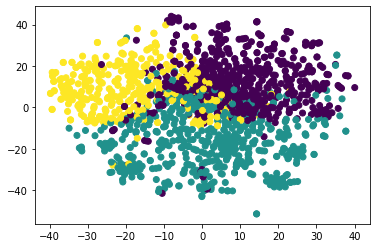

In [38]:
import matplotlib.pyplot as plt
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=groups_3.target)
plt.show()

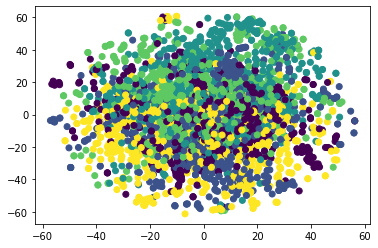

In [39]:
categories_5 = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x']
groups_5 = fetch_20newsgroups(categories=categories_5)

from nltk.corpus import names
all_names = set(names.words())
count_vector_sw5 = CountVectorizer(stop_words='english',max_features=500)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups_5.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) 
                           for word in doc.split()
                           if is_letter_only(word) and
                           word not in all_names)
    data_cleaned.append(doc_cleaned)
data_cleaned_count_5 = count_vector_sw5.fit_transform(data_cleaned)


tsne_model = TSNE(n_components = 2, perplexity = 40,
                  random_state=42,learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned_count_5.toarray())
import matplotlib.pyplot as plt
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=groups_5.target)
plt.show()